# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (5.2.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 


Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
#!pip install --upgrade ipywidgets
from ipywidgets import FloatProgress
# Define transforms
## YOUR CODE HERE ##
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
data_transforms = transforms.Compose([ 
    transforms.ToTensor(), 
    transforms.Normalize((0.5),(0.5))
])

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=data_transforms
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=64)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=data_transforms
)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=64)

Using device: cpu


1.0%

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




7.9%

100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

### Answer
In order to properly prepare data for training it is necessary to use preprocessing steps, such as data reshaping, to match the size of the images in the dataset (not needed in this case, as MNIST dataset is already preprocessed), normalization to help improve performance, and flattening to help model interpret images (within the model in this notebook). 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


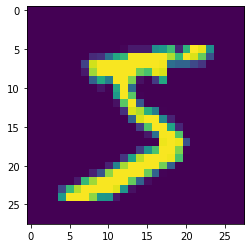

0


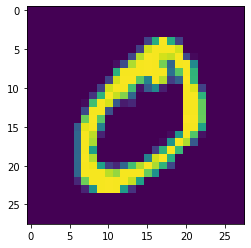

4


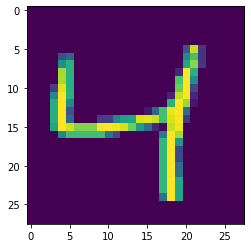

1


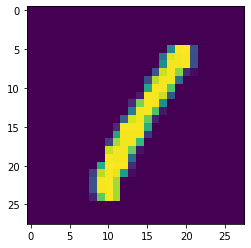

9


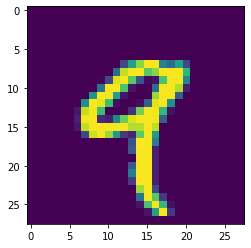

Training data size:  torch.Size([60000, 28, 28])
Training data targets size:  torch.Size([60000])
Shape:  torch.Size([1, 28, 28])
Label:  5


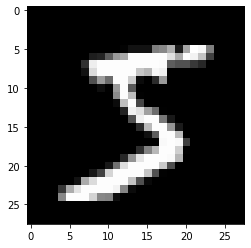

In [5]:
# Explore data
## YOUR CODE HERE ##
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=5)
show5(train_dataloader)

# dataset size
image, label = training_data[0]
print('Training data size: ',training_data.data.size())
print('Training data targets size: ' , training_data.targets.size())
plt.imshow(image.reshape((28,28)), cmap="gray")
print('Shape: ', image.shape)
print('Label: ', label)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##

device = torch.device('cpu')

model = NeuralNetwork()
model.to(device)  
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(device)

cpu


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
n_epochs = 10
#model.to(device)   
model.train()
t_loss = []
#data = data.to(device)

for epoch in range(n_epochs):
    train_loss = 0.0
    print(f'Epoch {epoch+1} is starting')
    
    model.train()  # Set the model to training mode
    
    for i, (data, target) in enumerate(train_dataloader, 1):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)

        if i % 100 == 0:
            print(f'Batch {i}/{len(train_dataloader)}: train_loss = {train_loss / (i * data.size(0)):.5f}')
    
    # Calculate the average training loss for the epoch
    train_loss /= len(training_data)
    t_loss.append(train_loss)
    
    print(f'Epoch {epoch+1} completed. Average training loss: {train_loss:.5f}')


Epoch 1 is starting
Batch 100/12000: train_loss = 2.27473
Batch 200/12000: train_loss = 2.25125
Batch 300/12000: train_loss = 2.21525
Batch 400/12000: train_loss = 2.15370
Batch 500/12000: train_loss = 2.05963
Batch 600/12000: train_loss = 1.93583
Batch 700/12000: train_loss = 1.81384
Batch 800/12000: train_loss = 1.69458
Batch 900/12000: train_loss = 1.58692
Batch 1000/12000: train_loss = 1.49010
Batch 1100/12000: train_loss = 1.40973
Batch 1200/12000: train_loss = 1.34043
Batch 1300/12000: train_loss = 1.27093
Batch 1400/12000: train_loss = 1.21515
Batch 1500/12000: train_loss = 1.17130
Batch 1600/12000: train_loss = 1.13060
Batch 1700/12000: train_loss = 1.09342
Batch 1800/12000: train_loss = 1.06318
Batch 1900/12000: train_loss = 1.03111
Batch 2000/12000: train_loss = 0.99754
Batch 2100/12000: train_loss = 0.96763
Batch 2200/12000: train_loss = 0.93845
Batch 2300/12000: train_loss = 0.91211
Batch 2400/12000: train_loss = 0.89411
Batch 2500/12000: train_loss = 0.87288
Batch 2600/120

Batch 8900/12000: train_loss = 0.15474
Batch 9000/12000: train_loss = 0.15416
Batch 9100/12000: train_loss = 0.15382
Batch 9200/12000: train_loss = 0.15410
Batch 9300/12000: train_loss = 0.15455
Batch 9400/12000: train_loss = 0.15397
Batch 9500/12000: train_loss = 0.15394
Batch 9600/12000: train_loss = 0.15394
Batch 9700/12000: train_loss = 0.15335
Batch 9800/12000: train_loss = 0.15302
Batch 9900/12000: train_loss = 0.15303
Batch 10000/12000: train_loss = 0.15321
Batch 10100/12000: train_loss = 0.15334
Batch 10200/12000: train_loss = 0.15307
Batch 10300/12000: train_loss = 0.15256
Batch 10400/12000: train_loss = 0.15215
Batch 10500/12000: train_loss = 0.15194
Batch 10600/12000: train_loss = 0.15218
Batch 10700/12000: train_loss = 0.15154
Batch 10800/12000: train_loss = 0.15150
Batch 10900/12000: train_loss = 0.15083
Batch 11000/12000: train_loss = 0.15054
Batch 11100/12000: train_loss = 0.15023
Batch 11200/12000: train_loss = 0.14988
Batch 11300/12000: train_loss = 0.14964
Batch 11400

Batch 5500/12000: train_loss = 0.07153
Batch 5600/12000: train_loss = 0.07155
Batch 5700/12000: train_loss = 0.07146
Batch 5800/12000: train_loss = 0.07147
Batch 5900/12000: train_loss = 0.07138
Batch 6000/12000: train_loss = 0.07096
Batch 6100/12000: train_loss = 0.07064
Batch 6200/12000: train_loss = 0.07044
Batch 6300/12000: train_loss = 0.07073
Batch 6400/12000: train_loss = 0.07110
Batch 6500/12000: train_loss = 0.07138
Batch 6600/12000: train_loss = 0.07131
Batch 6700/12000: train_loss = 0.07113
Batch 6800/12000: train_loss = 0.07082
Batch 6900/12000: train_loss = 0.07073
Batch 7000/12000: train_loss = 0.07098
Batch 7100/12000: train_loss = 0.07123
Batch 7200/12000: train_loss = 0.07094
Batch 7300/12000: train_loss = 0.07099
Batch 7400/12000: train_loss = 0.07064
Batch 7500/12000: train_loss = 0.07103
Batch 7600/12000: train_loss = 0.07108
Batch 7700/12000: train_loss = 0.07071
Batch 7800/12000: train_loss = 0.07056
Batch 7900/12000: train_loss = 0.07087
Batch 8000/12000: train_l

Batch 2100/12000: train_loss = 0.04423
Batch 2200/12000: train_loss = 0.04376
Batch 2300/12000: train_loss = 0.04288
Batch 2400/12000: train_loss = 0.04318
Batch 2500/12000: train_loss = 0.04243
Batch 2600/12000: train_loss = 0.04223
Batch 2700/12000: train_loss = 0.04177
Batch 2800/12000: train_loss = 0.04203
Batch 2900/12000: train_loss = 0.04153
Batch 3000/12000: train_loss = 0.04129
Batch 3100/12000: train_loss = 0.04123
Batch 3200/12000: train_loss = 0.04133
Batch 3300/12000: train_loss = 0.04091
Batch 3400/12000: train_loss = 0.04084
Batch 3500/12000: train_loss = 0.04063
Batch 3600/12000: train_loss = 0.04097
Batch 3700/12000: train_loss = 0.04093
Batch 3800/12000: train_loss = 0.04049
Batch 3900/12000: train_loss = 0.04068
Batch 4000/12000: train_loss = 0.04039
Batch 4100/12000: train_loss = 0.04036
Batch 4200/12000: train_loss = 0.04070
Batch 4300/12000: train_loss = 0.04057
Batch 4400/12000: train_loss = 0.04049
Batch 4500/12000: train_loss = 0.04054
Batch 4600/12000: train_l

Batch 10900/12000: train_loss = 0.03120
Batch 11000/12000: train_loss = 0.03116
Batch 11100/12000: train_loss = 0.03113
Batch 11200/12000: train_loss = 0.03107
Batch 11300/12000: train_loss = 0.03104
Batch 11400/12000: train_loss = 0.03090
Batch 11500/12000: train_loss = 0.03085
Batch 11600/12000: train_loss = 0.03073
Batch 11700/12000: train_loss = 0.03057
Batch 11800/12000: train_loss = 0.03041
Batch 11900/12000: train_loss = 0.03020
Batch 12000/12000: train_loss = 0.03062
Epoch 7 completed. Average training loss: 0.03062
Epoch 8 is starting
Batch 100/12000: train_loss = 0.03541
Batch 200/12000: train_loss = 0.03686
Batch 300/12000: train_loss = 0.03821
Batch 400/12000: train_loss = 0.03609
Batch 500/12000: train_loss = 0.03161
Batch 600/12000: train_loss = 0.03081
Batch 700/12000: train_loss = 0.02838
Batch 800/12000: train_loss = 0.02725
Batch 900/12000: train_loss = 0.02692
Batch 1000/12000: train_loss = 0.02648
Batch 1100/12000: train_loss = 0.02745
Batch 1200/12000: train_loss =

Batch 7600/12000: train_loss = 0.01790
Batch 7700/12000: train_loss = 0.01781
Batch 7800/12000: train_loss = 0.01783
Batch 7900/12000: train_loss = 0.01788
Batch 8000/12000: train_loss = 0.01790
Batch 8100/12000: train_loss = 0.01778
Batch 8200/12000: train_loss = 0.01779
Batch 8300/12000: train_loss = 0.01776
Batch 8400/12000: train_loss = 0.01778
Batch 8500/12000: train_loss = 0.01774
Batch 8600/12000: train_loss = 0.01790
Batch 8700/12000: train_loss = 0.01788
Batch 8800/12000: train_loss = 0.01790
Batch 8900/12000: train_loss = 0.01788
Batch 9000/12000: train_loss = 0.01777
Batch 9100/12000: train_loss = 0.01778
Batch 9200/12000: train_loss = 0.01778
Batch 9300/12000: train_loss = 0.01786
Batch 9400/12000: train_loss = 0.01777
Batch 9500/12000: train_loss = 0.01784
Batch 9600/12000: train_loss = 0.01786
Batch 9700/12000: train_loss = 0.01781
Batch 9800/12000: train_loss = 0.01778
Batch 9900/12000: train_loss = 0.01788
Batch 10000/12000: train_loss = 0.01790
Batch 10100/12000: train

Plot the training loss (and validation loss/accuracy, if recorded).

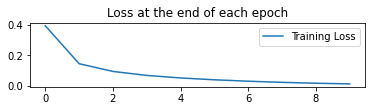

In [10]:
## YOUR CODE HERE ##
plt.subplot(3,1,1)
plt.plot(t_loss, label="Training Loss")
plt.title("Loss at the end of each epoch")
plt.legend()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

test_accuracy = []

model.eval() 

for data, target in test_dataloader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = pred.eq(target)
    for i in range(len(target)):
        label = target[i].item()
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))
for i in range(10):
    accurate = class_correct[i]/class_total[i]
    test_accuracy.append(accurate)

for i in range(10):
    print(f'Accuracy for {i}: {test_accuracy[i] * 100:.3f}%')



Test Loss: 6.831838

Accuracy for 0: 53.265%
Accuracy for 1: 95.859%
Accuracy for 2: 25.097%
Accuracy for 3: 24.653%
Accuracy for 4: 91.039%
Accuracy for 5: 80.493%
Accuracy for 6: 90.084%
Accuracy for 7: 96.790%
Accuracy for 8: 1.745%
Accuracy for 9: 94.450%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [23]:
## YOUR CODE HERE ##

device = torch.device('cpu')

# Create an instance of your neural network
model = NeuralNetwork().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
print(f'Device: {device}')

n_epochs = 12
t_loss = []

for epoch in range(n_epochs):
    train_loss = 0.0
    print(f'Epoch {epoch + 1}/{n_epochs} is starting')
    
    model.train()  # Set the model to training mode
    
    for i, (data, target) in enumerate(train_dataloader, 1):
        data = data.to(device)  # Move data to the same device as the model
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)

        if i % 100 == 0:
            print(f'Batch {i}/{len(train_dataloader)}: train_loss = {train_loss / (i * data.size(0)):.5f}')
    
    # Calculate the average training loss for the epoch
    train_loss /= len(train_dataloader.dataset)
    t_loss.append(train_loss)
    
    print(f'Epoch {epoch + 1}/{n_epochs} completed. Average training loss: {train_loss:.5f}')

Device: cpu
Epoch 1/12 is starting
Batch 100/12000: train_loss = 2.29729
Batch 200/12000: train_loss = 2.28436
Batch 300/12000: train_loss = 2.27218
Batch 400/12000: train_loss = 2.25783
Batch 500/12000: train_loss = 2.24045
Batch 600/12000: train_loss = 2.21996
Batch 700/12000: train_loss = 2.20035
Batch 800/12000: train_loss = 2.17583
Batch 900/12000: train_loss = 2.14805
Batch 1000/12000: train_loss = 2.11555
Batch 1100/12000: train_loss = 2.07662
Batch 1200/12000: train_loss = 2.03953
Batch 1300/12000: train_loss = 1.99653
Batch 1400/12000: train_loss = 1.95834
Batch 1500/12000: train_loss = 1.92765
Batch 1600/12000: train_loss = 1.89063
Batch 1700/12000: train_loss = 1.85307
Batch 1800/12000: train_loss = 1.81647
Batch 1900/12000: train_loss = 1.77926
Batch 2000/12000: train_loss = 1.74193
Batch 2100/12000: train_loss = 1.70416
Batch 2200/12000: train_loss = 1.66901
Batch 2300/12000: train_loss = 1.63457
Batch 2400/12000: train_loss = 1.60789
Batch 2500/12000: train_loss = 1.57841

Batch 8900/12000: train_loss = 0.33310
Batch 9000/12000: train_loss = 0.33240
Batch 9100/12000: train_loss = 0.33236
Batch 9200/12000: train_loss = 0.33266
Batch 9300/12000: train_loss = 0.33319
Batch 9400/12000: train_loss = 0.33214
Batch 9500/12000: train_loss = 0.33197
Batch 9600/12000: train_loss = 0.33184
Batch 9700/12000: train_loss = 0.33083
Batch 9800/12000: train_loss = 0.33016
Batch 9900/12000: train_loss = 0.33040
Batch 10000/12000: train_loss = 0.33115
Batch 10100/12000: train_loss = 0.33179
Batch 10200/12000: train_loss = 0.33134
Batch 10300/12000: train_loss = 0.33062
Batch 10400/12000: train_loss = 0.32990
Batch 10500/12000: train_loss = 0.33007
Batch 10600/12000: train_loss = 0.33070
Batch 10700/12000: train_loss = 0.32996
Batch 10800/12000: train_loss = 0.32988
Batch 10900/12000: train_loss = 0.32937
Batch 11000/12000: train_loss = 0.32925
Batch 11100/12000: train_loss = 0.32853
Batch 11200/12000: train_loss = 0.32773
Batch 11300/12000: train_loss = 0.32731
Batch 11400

Batch 5500/12000: train_loss = 0.24298
Batch 5600/12000: train_loss = 0.24264
Batch 5700/12000: train_loss = 0.24198
Batch 5800/12000: train_loss = 0.24196
Batch 5900/12000: train_loss = 0.24210
Batch 6000/12000: train_loss = 0.24285
Batch 6100/12000: train_loss = 0.24257
Batch 6200/12000: train_loss = 0.24279
Batch 6300/12000: train_loss = 0.24435
Batch 6400/12000: train_loss = 0.24479
Batch 6500/12000: train_loss = 0.24551
Batch 6600/12000: train_loss = 0.24531
Batch 6700/12000: train_loss = 0.24511
Batch 6800/12000: train_loss = 0.24373
Batch 6900/12000: train_loss = 0.24301
Batch 7000/12000: train_loss = 0.24348
Batch 7100/12000: train_loss = 0.24328
Batch 7200/12000: train_loss = 0.24229
Batch 7300/12000: train_loss = 0.24216
Batch 7400/12000: train_loss = 0.24128
Batch 7500/12000: train_loss = 0.24364
Batch 7600/12000: train_loss = 0.24379
Batch 7700/12000: train_loss = 0.24299
Batch 7800/12000: train_loss = 0.24293
Batch 7900/12000: train_loss = 0.24346
Batch 8000/12000: train_l

Batch 2100/12000: train_loss = 0.18525
Batch 2200/12000: train_loss = 0.18373
Batch 2300/12000: train_loss = 0.18130
Batch 2400/12000: train_loss = 0.18403
Batch 2500/12000: train_loss = 0.18378
Batch 2600/12000: train_loss = 0.18785
Batch 2700/12000: train_loss = 0.18867
Batch 2800/12000: train_loss = 0.18943
Batch 2900/12000: train_loss = 0.19092
Batch 3000/12000: train_loss = 0.19299
Batch 3100/12000: train_loss = 0.19334
Batch 3200/12000: train_loss = 0.19370
Batch 3300/12000: train_loss = 0.19273
Batch 3400/12000: train_loss = 0.19289
Batch 3500/12000: train_loss = 0.19264
Batch 3600/12000: train_loss = 0.19298
Batch 3700/12000: train_loss = 0.19165
Batch 3800/12000: train_loss = 0.19053
Batch 3900/12000: train_loss = 0.18976
Batch 4000/12000: train_loss = 0.18940
Batch 4100/12000: train_loss = 0.18851
Batch 4200/12000: train_loss = 0.19097
Batch 4300/12000: train_loss = 0.19072
Batch 4400/12000: train_loss = 0.19034
Batch 4500/12000: train_loss = 0.19020
Batch 4600/12000: train_l

Batch 10900/12000: train_loss = 0.17152
Batch 11000/12000: train_loss = 0.17139
Batch 11100/12000: train_loss = 0.17107
Batch 11200/12000: train_loss = 0.17075
Batch 11300/12000: train_loss = 0.17062
Batch 11400/12000: train_loss = 0.17004
Batch 11500/12000: train_loss = 0.16947
Batch 11600/12000: train_loss = 0.16924
Batch 11700/12000: train_loss = 0.16848
Batch 11800/12000: train_loss = 0.16781
Batch 11900/12000: train_loss = 0.16706
Batch 12000/12000: train_loss = 0.16705
Epoch 7/12 completed. Average training loss: 0.16705
Epoch 8/12 is starting
Batch 100/12000: train_loss = 0.14788
Batch 200/12000: train_loss = 0.16601
Batch 300/12000: train_loss = 0.18677
Batch 400/12000: train_loss = 0.17016
Batch 500/12000: train_loss = 0.15687
Batch 600/12000: train_loss = 0.15074
Batch 700/12000: train_loss = 0.14430
Batch 800/12000: train_loss = 0.14000
Batch 900/12000: train_loss = 0.14068
Batch 1000/12000: train_loss = 0.14026
Batch 1100/12000: train_loss = 0.14113
Batch 1200/12000: train_

Batch 7500/12000: train_loss = 0.13953
Batch 7600/12000: train_loss = 0.13968
Batch 7700/12000: train_loss = 0.13911
Batch 7800/12000: train_loss = 0.13896
Batch 7900/12000: train_loss = 0.13933
Batch 8000/12000: train_loss = 0.13918
Batch 8100/12000: train_loss = 0.13886
Batch 8200/12000: train_loss = 0.13854
Batch 8300/12000: train_loss = 0.13926
Batch 8400/12000: train_loss = 0.13909
Batch 8500/12000: train_loss = 0.13947
Batch 8600/12000: train_loss = 0.13991
Batch 8700/12000: train_loss = 0.13945
Batch 8800/12000: train_loss = 0.13942
Batch 8900/12000: train_loss = 0.13939
Batch 9000/12000: train_loss = 0.13921
Batch 9100/12000: train_loss = 0.13917
Batch 9200/12000: train_loss = 0.13966
Batch 9300/12000: train_loss = 0.14047
Batch 9400/12000: train_loss = 0.14006
Batch 9500/12000: train_loss = 0.14032
Batch 9600/12000: train_loss = 0.14050
Batch 9700/12000: train_loss = 0.14006
Batch 9800/12000: train_loss = 0.13996
Batch 9900/12000: train_loss = 0.14017
Batch 10000/12000: train_

Batch 4100/12000: train_loss = 0.11288
Batch 4200/12000: train_loss = 0.11482
Batch 4300/12000: train_loss = 0.11474
Batch 4400/12000: train_loss = 0.11471
Batch 4500/12000: train_loss = 0.11484
Batch 4600/12000: train_loss = 0.11488
Batch 4700/12000: train_loss = 0.11450
Batch 4800/12000: train_loss = 0.11477
Batch 4900/12000: train_loss = 0.11421
Batch 5000/12000: train_loss = 0.11441
Batch 5100/12000: train_loss = 0.11385
Batch 5200/12000: train_loss = 0.11421
Batch 5300/12000: train_loss = 0.11419
Batch 5400/12000: train_loss = 0.11525
Batch 5500/12000: train_loss = 0.11526
Batch 5600/12000: train_loss = 0.11524
Batch 5700/12000: train_loss = 0.11501
Batch 5800/12000: train_loss = 0.11492
Batch 5900/12000: train_loss = 0.11490
Batch 6000/12000: train_loss = 0.11503
Batch 6100/12000: train_loss = 0.11486
Batch 6200/12000: train_loss = 0.11461
Batch 6300/12000: train_loss = 0.11519
Batch 6400/12000: train_loss = 0.11565
Batch 6500/12000: train_loss = 0.11616
Batch 6600/12000: train_l

In [24]:
## TESTING MODEL ##
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

test_accuracy = []

model.eval() 

for data, target in test_dataloader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = pred.eq(target)
    for i in range(len(target)):
        label = target[i].item()
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))
for i in range(10):
    accurate = class_correct[i]/class_total[i]
    test_accuracy.append(accurate)


TypeError: state_dict() missing 1 required positional argument: 'self'
    print(f'Accuracy for {i}: {test_accuracy[i] * 100:.3f}%')

Test Loss: 11.618191

Accuracy for 0: 9.286%
Accuracy for 1: 24.846%
Accuracy for 2: 2.326%
Accuracy for 3: 0.000%
Accuracy for 4: 100.000%
Accuracy for 5: 45.516%
Accuracy for 6: 12.839%
Accuracy for 7: 59.533%
Accuracy for 8: 0.000%
Accuracy for 9: 0.000%


## Saving your model
Using `torch.save`, save your model for future loading.

In [29]:
## YOUR CODE HERE ##
model = NeuralNetwork()
for i in range(10):
    torch.save(model.state_dict(), 'Mnist-Classification-Project.pt')